In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [134]:
df = pd.read_csv('day.csv')

In [135]:
df.drop(labels='instant',axis=1,inplace=True)

In [136]:
seasons_num = df['season'].unique()

In [137]:
seasons = ['spring', 'summer', 'fall', 'winter']

In [138]:
seasons_dict = dict(zip(seasons_num, seasons))

In [139]:
df['seasons'] = df['season'].map(seasons_dict)

In [140]:
df = pd.concat([df, pd.get_dummies(df['seasons'])], 1)

In [141]:
weather_num = df['weathersit'].unique()
weathersits = ['clear', 'misty', 'light_storm', 'heavy_storm']
weather_dict = dict(zip(weather_num, weathersits))
df['weather'] = df['weathersit'].map(weather_dict)
df = pd.concat([df, pd.get_dummies(df['weather'])], 1)

In [142]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [143]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [144]:
df = columnize(df, 'weekday', ['sat','sun','mon','tues','wed','thurs','fri'], 'weekdays')

In [145]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'seasons', 'fall', 'spring', 'summer', 'winter',
       'weather', 'clear', 'light_storm', 'misty', 'weekdays', 'fri', 'mon',
       'sat', 'sun', 'thurs', 'tues', 'wed'],
      dtype='object')

In [146]:
lr_model = ols(formula='cnt~hum+winter', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.308
Date:                Tue, 20 Aug 2019   Prob (F-statistic):            0.00192
Time:                        13:59:19   Log-Likelihood:                -6563.4
No. Observations:                 731   AIC:                         1.313e+04
Df Residuals:                     728   BIC:                         1.315e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5388.5264    321.955     16.737      0.000    4756.454    6020.598
hum        -1555.4517    506.535     -3.071      0.002   -2549.896    -561.007
winter       379.7969    167.979      2.261      0.024      50.015     709.579
==============================================================================
Omnibus:                       66.801   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.104
Skew:                          -0.041   Prob(JB):                     2.61e-05
Kurtosis:                       2.172   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

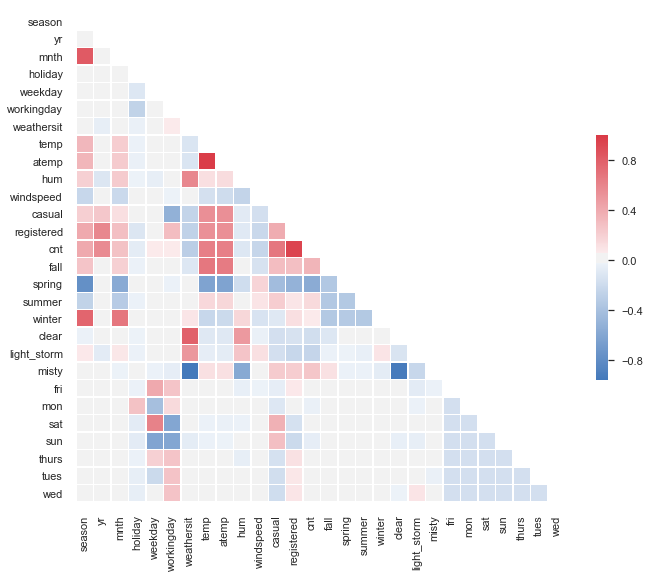

In [147]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

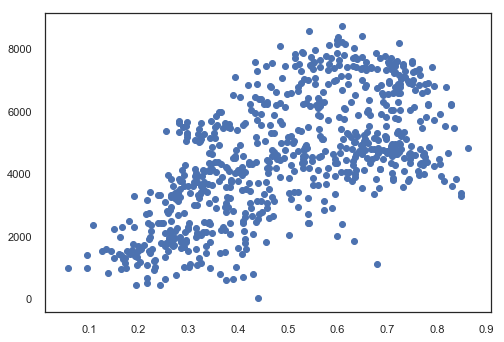

In [148]:
plt.scatter(df.temp, df.cnt)

In [149]:
df['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [150]:
sns.pairplot(df, diag_kind="kde", height=2.5)

Error in callback <function flush_figures at 0x11376e9d8> (for post_execute):


KeyboardInterrupt: 

In [155]:
feats = list(df.select_dtypes(include=['int64','float64']).columns)

In [156]:
n = 4
row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]

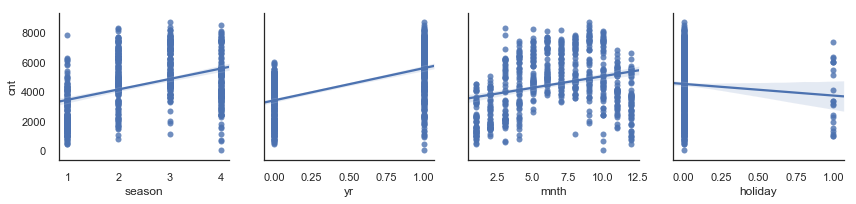

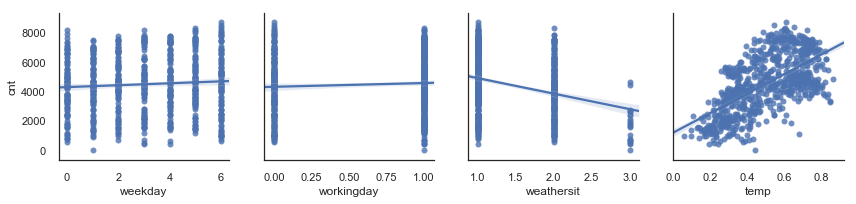

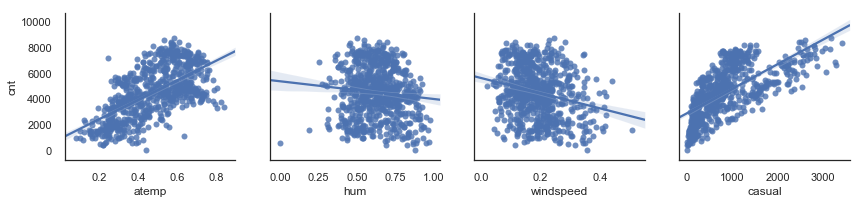

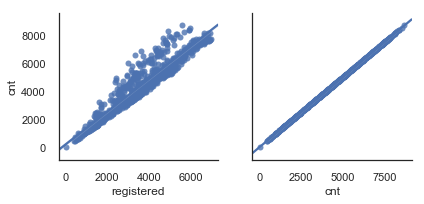

In [157]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['cnt'],x_vars=i, kind="reg", height=3)

In [193]:
def day_season(df,season,day):
    df[f'{season}_{day}_cnt'] = df[f'{season}']*df['cnt']*df[f'{day}']
    return

In [194]:
for s in ['summer','fall','winter','spring']:
    for d in ['sat','sun','mon','tues','wed','thurs','fri']:
        day_season(df,s,d)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,winter_wed_cnt,winter_thurs_cnt,winter_fri_cnt,spring_sat_cnt,spring_sun_cnt,spring_mon_cnt,spring_tues_cnt,spring_wed_cnt,spring_thurs_cnt,spring_fri_cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,0,0,0,985,0,0,0,0,0,0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,...,0,0,0,0,801,0,0,0,0,0
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,...,0,0,0,0,0,1349,0,0,0,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,...,0,0,0,0,0,0,1562,0,0,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,...,0,0,0,0,0,0,0,1600,0,0


In [197]:
def s_day_df(df,season,day):
    return df[df[f'{season}_{day}_cnt']>0]

In [199]:
import itertools

In [200]:
seasons = ['summer','fall','winter','spring']
days = ['sat','sun','mon','tues','wed','thurs','fri']

In [203]:
for r in itertools.product(seasons,days):
    r = 0

SyntaxError: can't assign to literal (<ipython-input-203-2eb6c54357e5>, line 2)

In [195]:
def day_graphs(df,season,day):
    feats = list(df.select_dtypes(include=['int64','float64']).columns)
    n = 4
    row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]
    for i in row_groups:
        pp = sns.pairplot(data=df, y_vars=[f'{season}_{day}_cnt'],x_vars=i, kind="reg", height=3)
    return

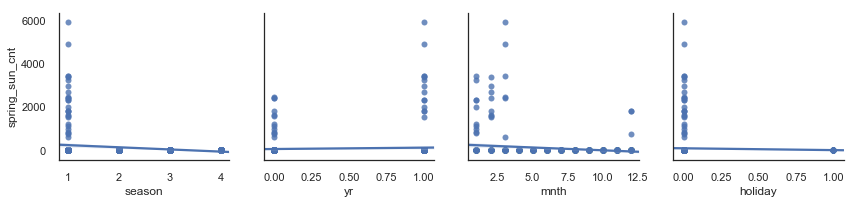

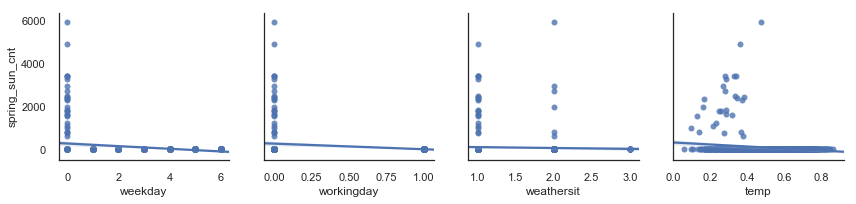

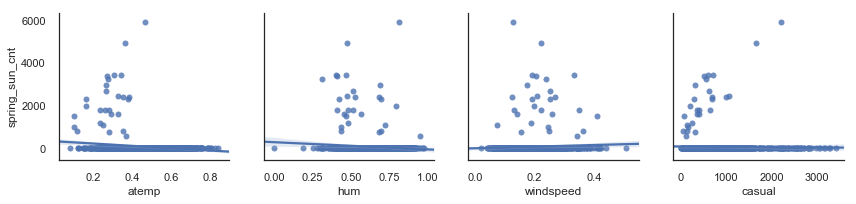

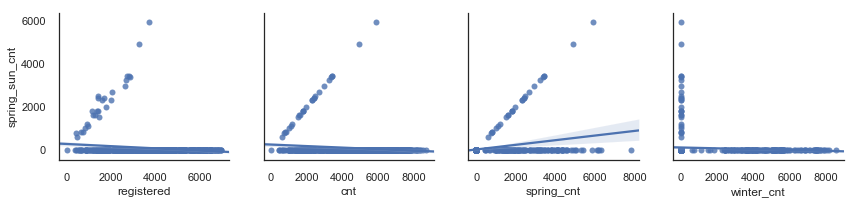

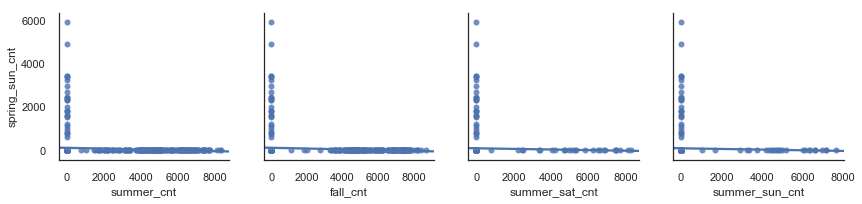

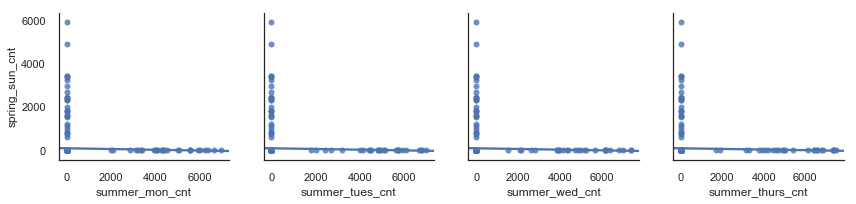

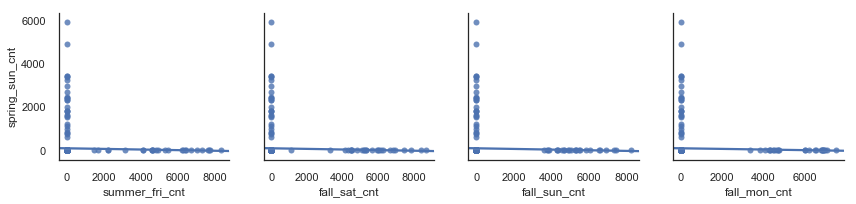

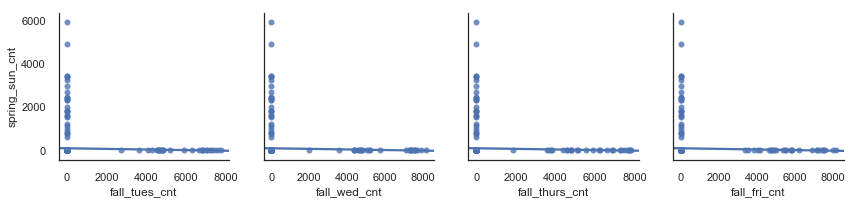

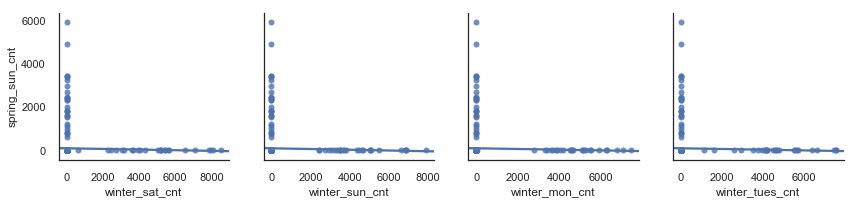

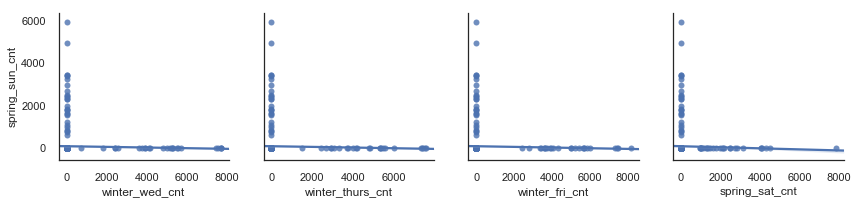

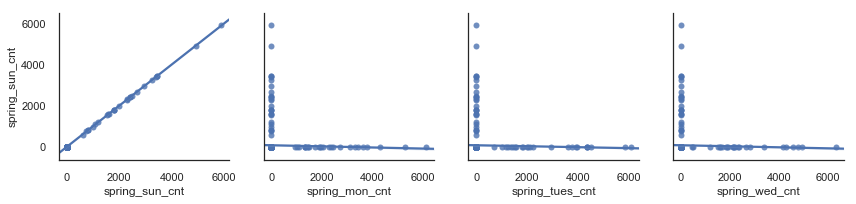

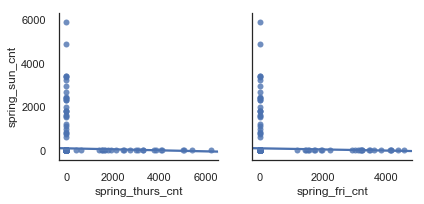

In [196]:
day_graphs(df,'spring','sun')

In [161]:
df['spring_cnt'] = df['spring']*df['cnt']
df['winter_cnt'] = df['winter']*df['cnt']
df['summer_cnt'] = df['summer']*df['cnt']
df['fall_cnt'] = df['fall']*df['cnt']

In [184]:
def season_df(df,season):
    return df[df[f'{season}_cnt']>0]

In [188]:
wint = season_df(df,'winter')
summer = season_df(df,'summer')
fall = season_df(df,'fall')

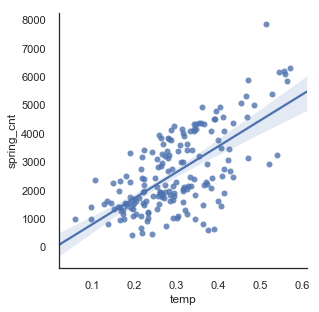

In [185]:
spr = df[df['spring_cnt']>0]
sns.pairplot(data=spr, y_vars=['spring_cnt'],x_vars=['temp'], kind="reg",height=4.5)

In [180]:
model = ols(formula='spring_cnt~temp+hum+windspeed+clear+misty+light_storm+sun+mon+tues+wed+thurs+fri+sat', data=spr).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spring_cnt   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     17.72
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           4.68e-23
Time:                        14:18:40   Log-Likelihood:                -1498.1
No. Observations:                 181   AIC:                             3020.
Df Residuals:                     169   BIC:                             3059.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     637.4268    359.042      1.775      0.078     -71.358    1346.211
temp         9372.5059    750.157     12.494      0.000    7891.621    1.09e+04
hum         -1450.0700    647.051     -2.241      0.026   -2727.414    -172.726
windspeed   -3143.6208    943.671     -3.331      0.001   -5006.522   -1280.720
clear         459.3599    218.449      2.103      0.037      28.120     890.599
misty         738.8658    169.459      4.360      0.000     404.338    1073.394
light_storm  -560.7989    402.328     -1.394      0.165   -1355.034     233.436
sun          -197.6548    187.848     -1.052      0.294    -568.485     173.175
mon            68.5099    186.333      0.368      0.714    -299.330     436.350
tues          216.8526    191.298      1.134      0.259    -160.789     594.494
wed           212.0269    194.747      1.089      0.278    -172.423     596.477
thurs         103.0715    187.193      0.551      0.583    -266.466     472.609
fri           238.1383    190.735      1.249      0.214    -138.393     614.669
sat            -3.5176    184.125     -0.019      0.985    -366.999     359.964
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.439
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.789   Cond. No.                     2.56e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [181]:
spr_feats = list(spr.select_dtypes(include=['int64','float64']).columns)

In [182]:
def season_graphs(df,season):
    feats = list(df.select_dtypes(include=['int64','float64']).columns)
    n = 4
    row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]
    for i in row_groups:
        pp = sns.pairplot(data=df, y_vars=[f'{season}_cnt'],x_vars=i, kind="reg", height=3)
    return

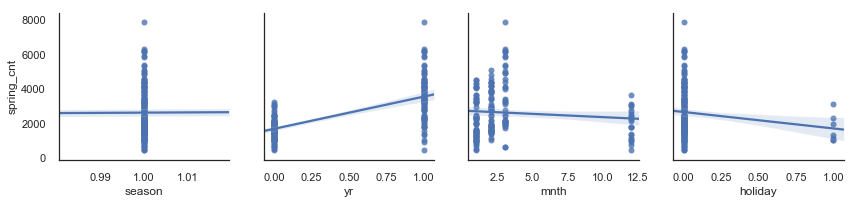

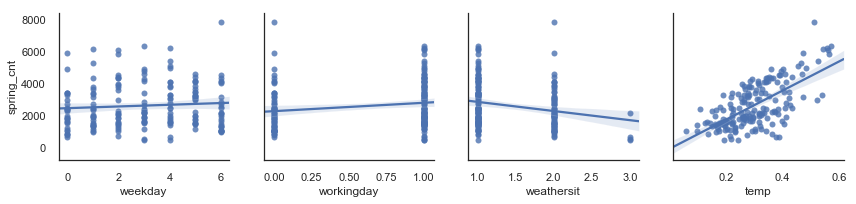

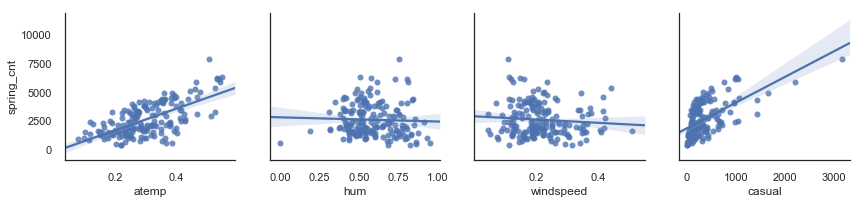

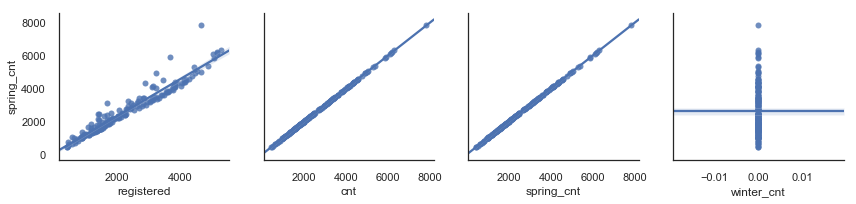

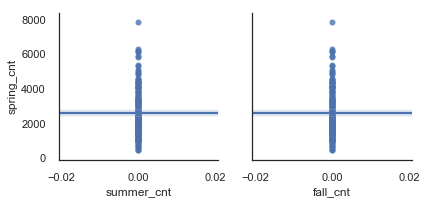

In [183]:
season_graphs(spr,'spring')

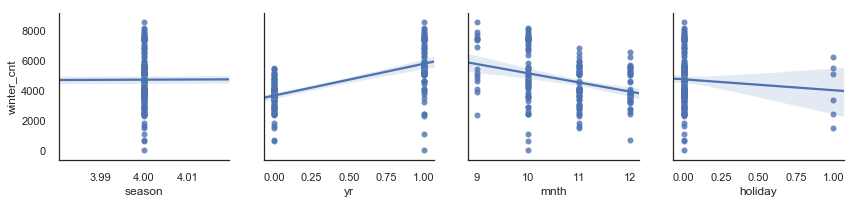

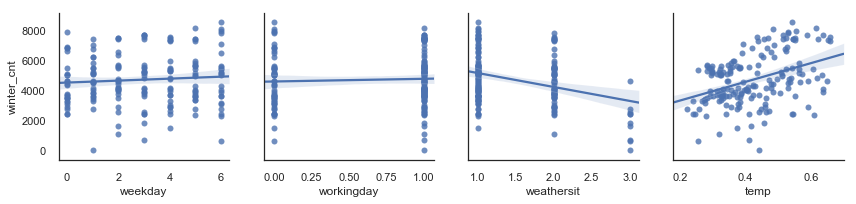

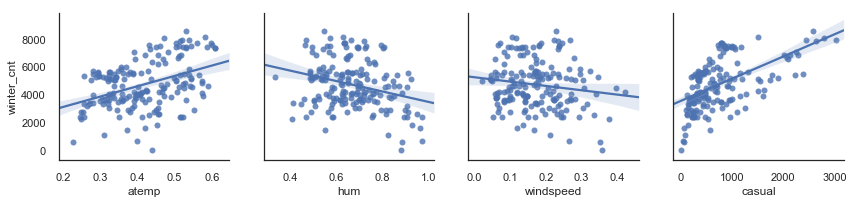

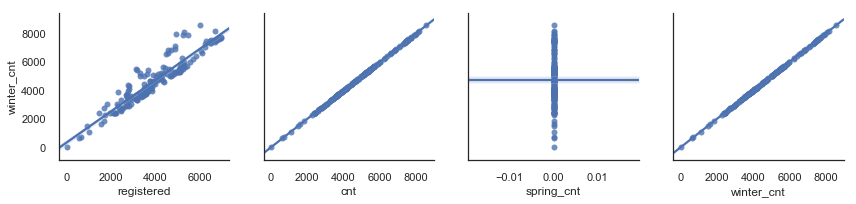

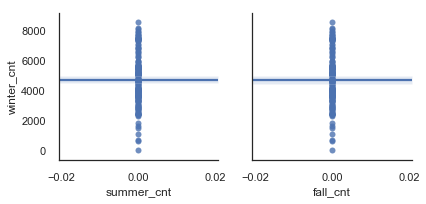

In [189]:
season_graphs(wint,'winter')

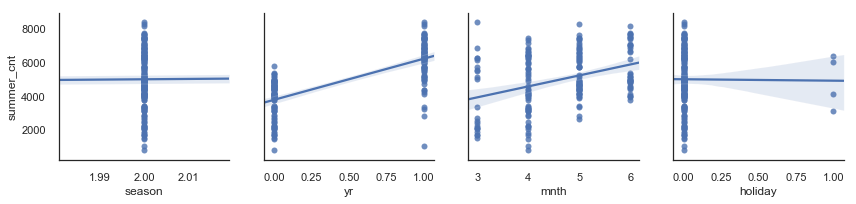

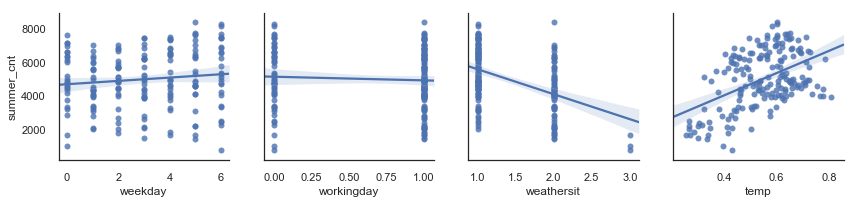

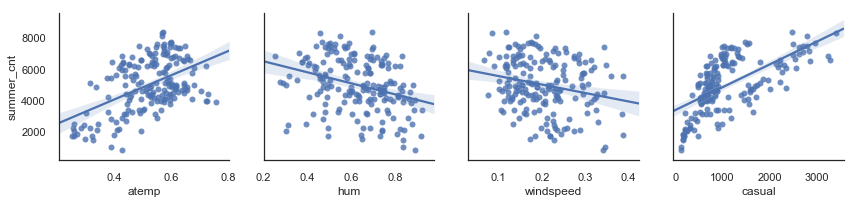

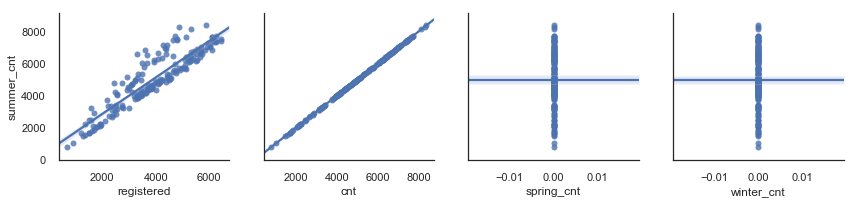

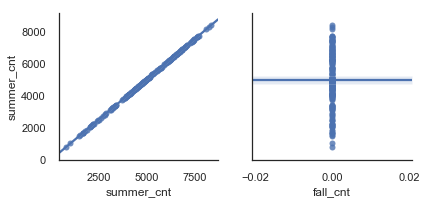

In [190]:
season_graphs(summer,'summer')

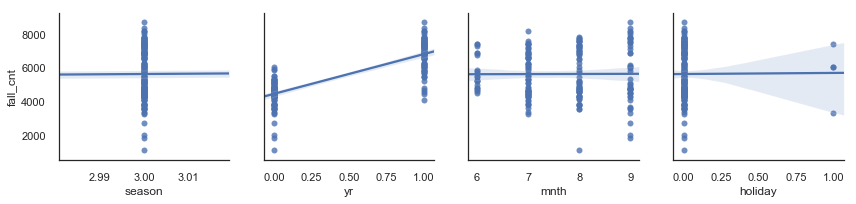

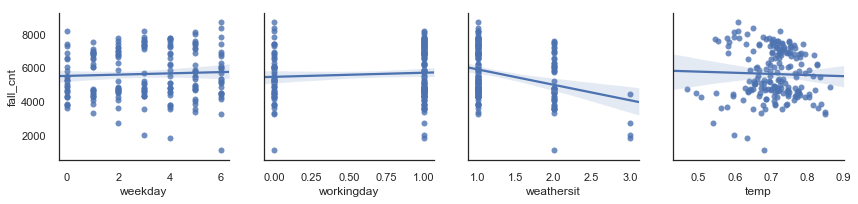

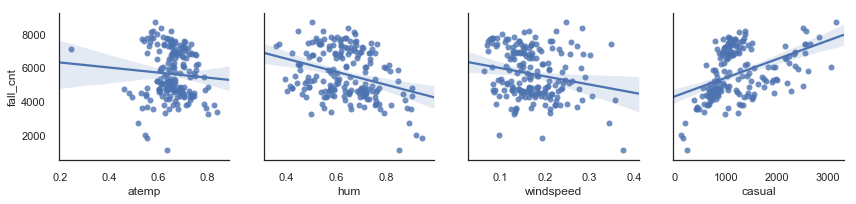

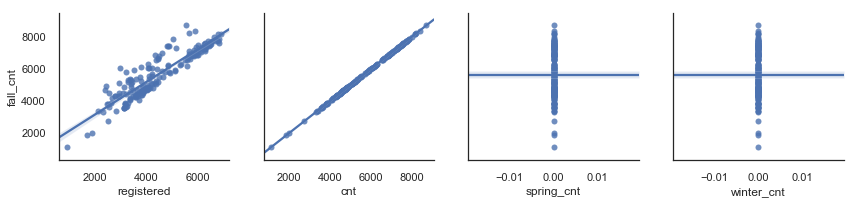

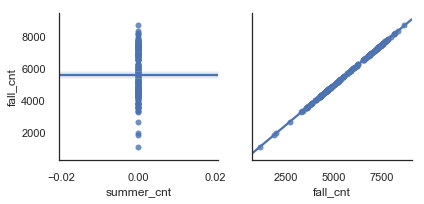

In [191]:
season_graphs(fall,'fall')